## (미니 배치) 확률적 경사 하강법

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 실제값을 Y=8X+2 시뮬레이션하는 데이터 값 생성
* np.random.seed(0)
* 0과 1사이의 600개의 랜덤 값을 지정한다.
* X, y의 scatter plot으로 시각화 한다.

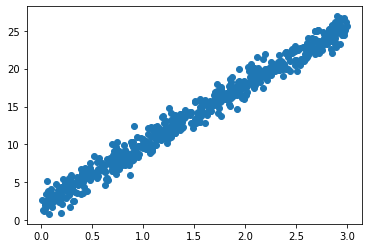

In [220]:
np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 3 * np.random.rand(600,1)
y = 2 +8 * X+ np.random.randn(600,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

### w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성.
* def get_weight_updates(w1, w0, X, y, learning_rate=0.01):

In [213]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

### 반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성

In [221]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((600,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(600, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

### 예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행

In [222]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:7.887 w0:2.131
Gradient Descent Total Cost:0.9733


### 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출
* def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0

In [223]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [224]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 7.906 w0: 2.174
Stochastic Gradient Descent Total Cost:0.9791


# 영화 관객수 예측 모델

movies_data.csv 파일이 존재합니다.

영화에 관련된 여러가지 피처들을 통해 관객수를 예측해내는 것이 목표입니다.

- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

데이터셋 출처: https://dacon.io/competitions/open/235536/data

(학습을 위해 원래 데이터셋에서 test.csv는 제외하고, train.csv 파일만을 고려하여 진행했습니다.)

In [2]:
#필요한 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#데이터셋 불러오기
movie = pd.read_csv('movies_data.csv')

## 데이터 전처리, EDA 및 시각화

### wine_data 데이터를 살펴보고, 분석에 쓸모 없을 것 같은 column을 삭제하시오.
title, distributor, release_time, director 열 삭제

In [4]:
movie.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


In [5]:
del_columns = ['title', 'distributor', 'release_time', 'director']
for i in del_columns:
    del movie[i]

movie.columns

Index(['genre', 'time', 'screening_rat', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

### movie 데이터에서 결측치가 있는지 확인하고, 그 결측치를 0으로 채우시오.
dir_prev_bfnum의 변수 설명에서 관객수가 알려지지 않은 영화는 제외한다고 했으므로 단순하게 0으로 결측치 처리

In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre           600 non-null    object 
 1   time            600 non-null    int64  
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  270 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 37.6+ KB


In [7]:
movie['dir_prev_bfnum'].fillna(0, inplace=True)

In [8]:
#결측치가 잘 채워졌는지 확인
movie['dir_prev_bfnum'].isna().sum()

0

### 수치형 column들의 분포도를 히스토그램을 통해 시각적으로 살펴보고, 분포가 왜곡되어 있는 column이 있는지 판단하시오.

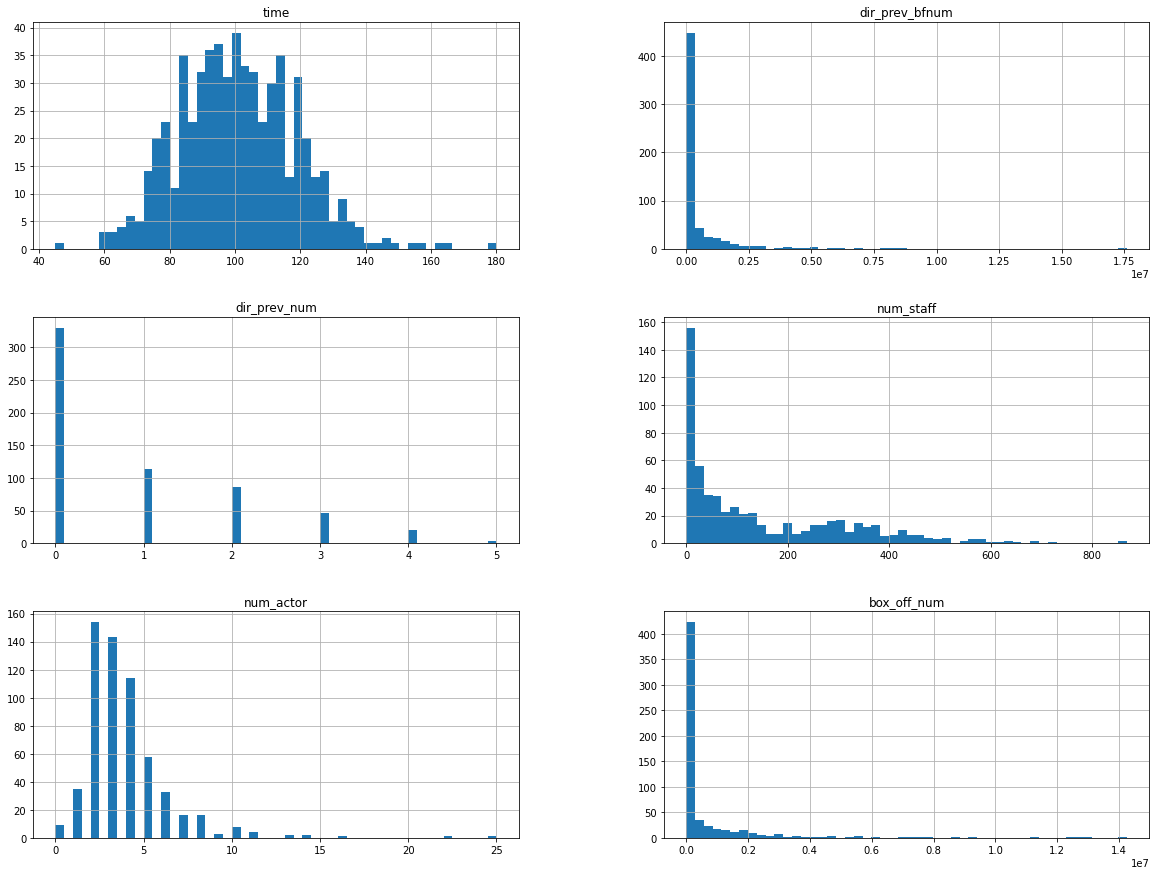

In [9]:
movie.hist(bins=50, figsize=(20,15))
plt.show()

### 위 문제에서 보았듯이, 타겟 변수인 box_off_num의 분포가 한 쪽으로 치우쳐져 있다. 타겟 변수에 대해 적절한 transformation을 적용하시오.

-> box_off_num(타겟 변수), dir_prev_bfnum, num_actor, num_staff의 분포가 왜곡되어 보임 (후에 파이프라인에서 스케일링 작업 할 것)

In [10]:
movie['box_off_num'] = np.log1p(movie['box_off_num'])

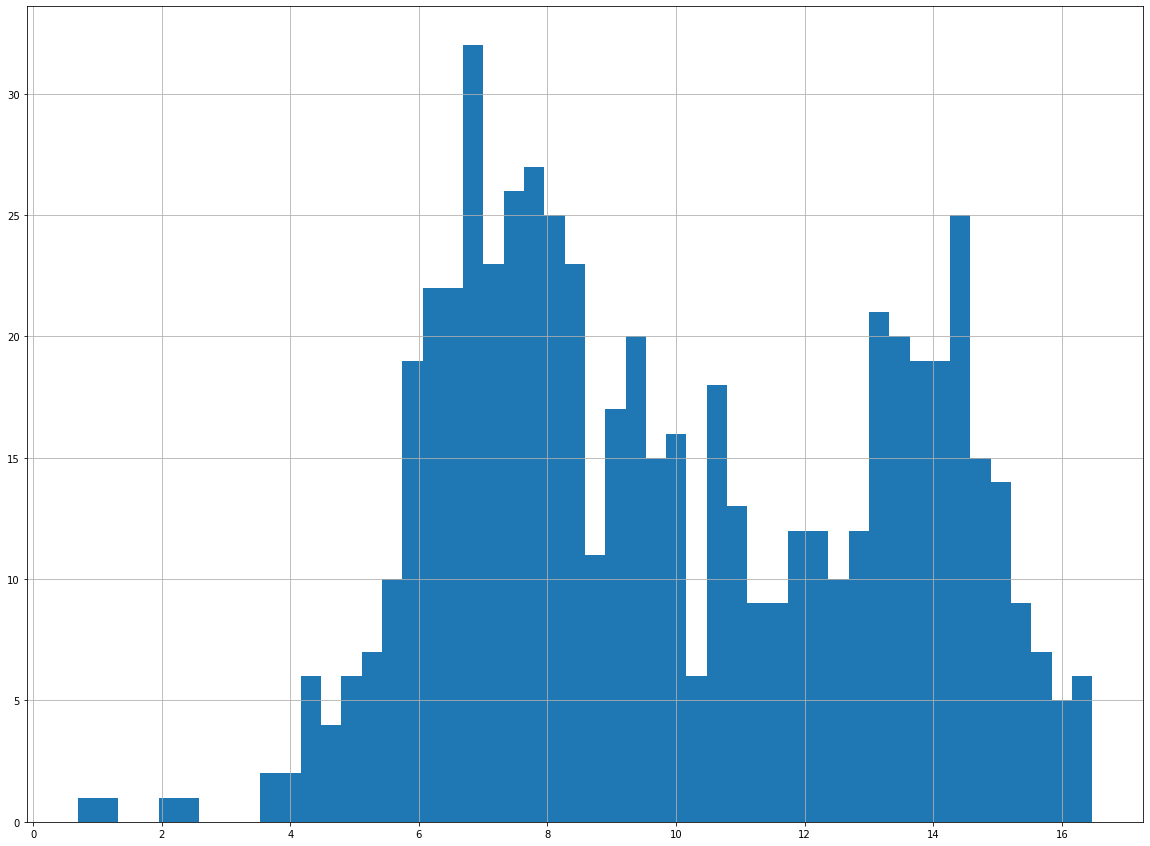

In [148]:
#잘 transfromation 되었는지 확인
movie['box_off_num'].hist(bins=50, figsize=(20,15))
plt.show()

## Linear Regression OLS로 학습/예측/평가 수행
* x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
* mse, rmse, r2_score을 출력
* 선형 회귀에 사용하는 설명 변수: ['time', 'dir_prev_bfnum', 'num_staff']

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split

x = movie[['time', 'dir_prev_bfnum', 'num_staff']]
y = movie[['box_off_num']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
lr = LinearRegression()
lr.fit(x_train ,y_train )
y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 5.622 , RMSE : 2.371
Variance score : 0.537


### * 위에서 구한 모델의 절편과 회귀계수를 출력
* 회귀 계수는 round 하지 않고 그대로 출력한다.

In [150]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', lr.coef_)

절편 값: [4.62242162]
회귀 계수값: [[3.37778358e-02 1.91165289e-07 1.23297090e-02]]


### * cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구한다.

In [151]:
from sklearn.model_selection import cross_val_score

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-4.12 -4.71 -4.66 -5.17 -4.58]
 5 folds 의 개별 RMSE scores :  [2.03 2.17 2.16 2.27 2.14]
 5 folds 의 평균 RMSE : 2.155 


### numerical과 categorical로 구분하여 저장한 후, 수치형 변수와 범주형 변수를 확인한다.

In [174]:
## 수치형 / 범주형 변수 구분
numerical= movie.drop(['box_off_num'], axis=1).select_dtypes('number').columns

categorical = movie.select_dtypes('object').columns

print(f'Numerical Columns:  {movie[numerical].columns}')
print('\n')
print(f'Categorical Columns: {movie[categorical].columns}')

Numerical Columns:  Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor'], dtype='object')


Categorical Columns: Index(['genre', 'screening_rat'], dtype='object')


### 위에서 지정한 numerical 변수 간의 상관관계를 heatmap을 통해 표현한다.

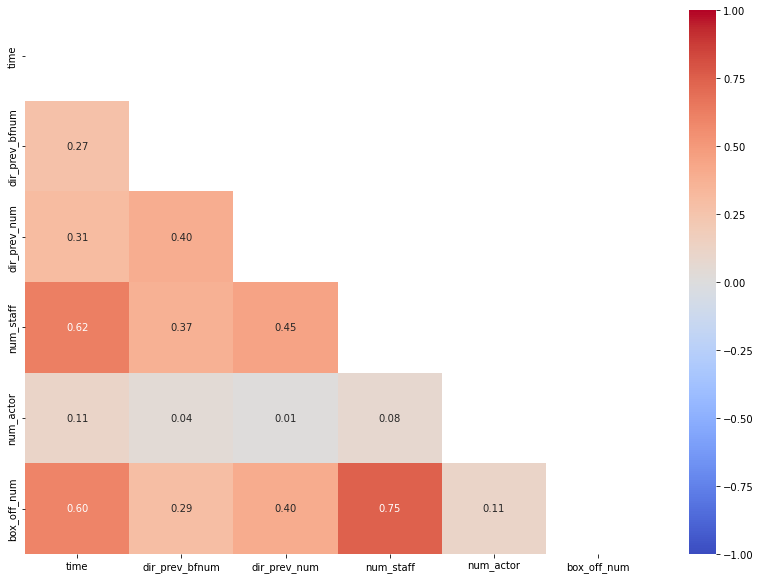

In [175]:
matrix = np.triu(movie[numerical1].corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (movie[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

### 데이터에서 피쳐값과 타겟값을 분리하여 각각 X_movie, y_movie으로 저장하시오. (target은 box_off_num)

In [11]:
X_movie = movie.drop(['box_off_num'], axis=1, inplace=False)
y_movie = movie['box_off_num']

In [12]:
#데이터 확인 (X_movie)
X_movie.head(3)

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,액션,96,청소년 관람불가,0.00,0,91,2
1,느와르,130,청소년 관람불가,1161602.50,2,387,3
2,액션,123,15세 관람가,220775.25,4,343,4


In [13]:
#데이터 확인(y_movie)
y_movie.head(3)

0    10.060449
1    15.771725
2    15.755558
Name: box_off_num, dtype: float64

### 피쳐값 중 카테고리 변수가 2가지 있다. 2개의 카테고리 변수가 어떤 값을 갖고 있는지 파악하시오. 이에 대해 Encoding을 진행하고 각각 어떻게 Encoding 되었는지 설명하시오. (LabelEncoder 사용)
ex) 드라마 4, 청불 3, ...

In [14]:
print(X_movie['genre'].value_counts())
X_movie['screening_rat'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64


청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [15]:
#genre, screening_rat 피쳐에 대해 Encoding 진행
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_movie['genre'] =le.fit_transform(X_movie['genre'])
X_movie['screening_rat'] =le.fit_transform(X_movie['screening_rat'])

In [16]:
#Encoding이 잘 되었는지 확인
print(X_movie['genre'].value_counts())
X_movie['screening_rat'].value_counts()

4     221
3      93
5      78
11     53
1      42
10     28
2      27
9      21
7      17
0      13
6       5
8       2
Name: genre, dtype: int64


3    204
1    202
0    102
2     92
Name: screening_rat, dtype: int64

### train_test_split()을 이용해 train set와 test set를 분리하시오.
- testset 의 size : 전체 데이터 셋의 20%
- 각 set의 이름 : X_train, X_test, y_train, y_test
- random_state = 123

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_movie, y_movie, test_size=0.2, random_state=123)

In [18]:
#잘 분리되었는지 확인
print(X_train.shape, X_test.shape)

(480, 7) (120, 7)


## 선형 규제 모델 사용해보기

### 릿지
- 릿지 회귀를 적용하여 5개 폴드의 개별 RMSE와 평균 RMSE 점수를 구하시오. 
- random_state=123
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개, alpha=10

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [20]:
ridge = Ridge(random_state=123,alpha=10)
ridge.fit(X_train, y_train)
pred=ridge.predict(X_test)
neg_mse_scores = cross_val_score(ridge, X_test, y_test, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 RMSE scores :  [2.387 2.453 2.175 2.223 2.1  ]
 5 folds 의 평균 RMSE : 2.268 


- 알파 값을 변화시켜가며 릿지를 수행하시오.
- alphas = [0 , 0.1 , 1 , 10 , 100]

In [21]:
alphas = [0 , 0.1 , 1 , 10 , 100]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    neg_mse_scores = cross_val_score(ridge,  X_test, y_test,
                                     scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 2.277 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 2.277 
alpha 1 일 때 5 folds 의 평균 RMSE : 2.276 
alpha 10 일 때 5 folds 의 평균 RMSE : 2.268 
alpha 100 일 때 5 folds 의 평균 RMSE : 2.230 


- 위의 알파 값에 따른 피처별 회귀계수를 시각화하시오.

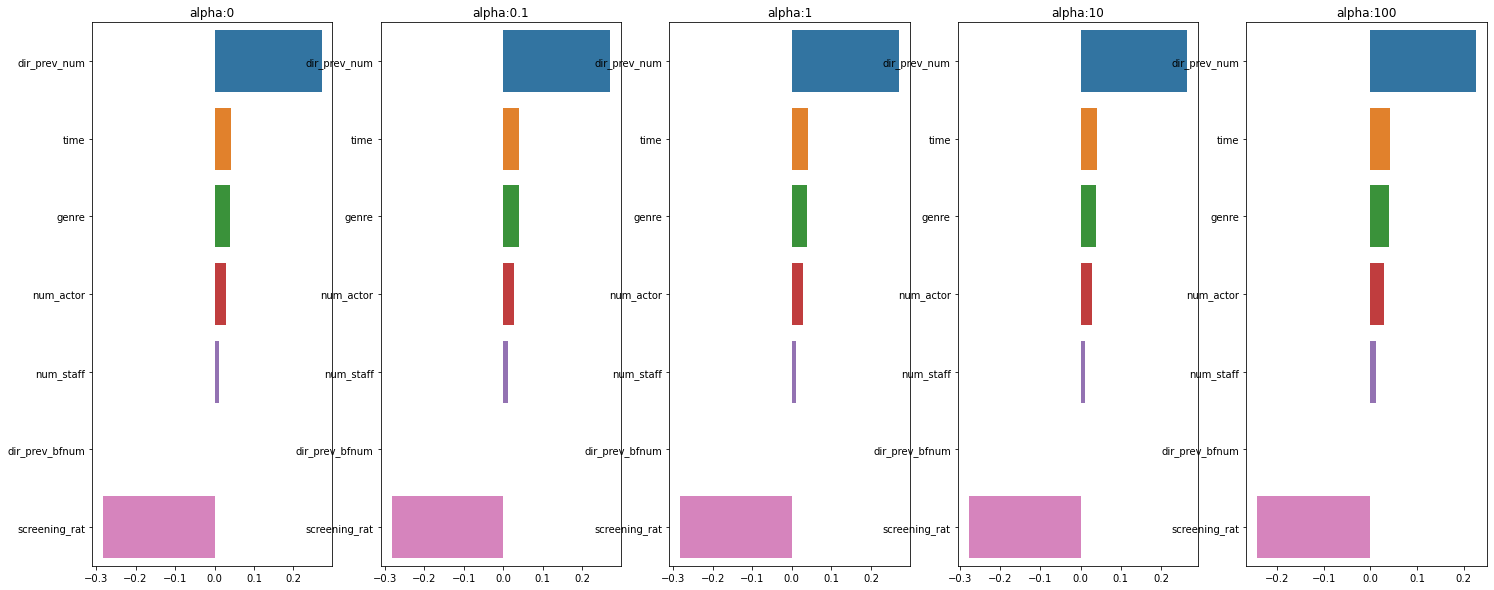

In [23]:
fig , axs = plt.subplots(figsize=(25,10), nrows=1 , ncols=5)

coeff_df = pd.DataFrame()

for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train , y_train)
    coeff = pd.Series(data=ridge.coef_ , index=X_train.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])
plt.show()

- 알파 값에 따른 피처별 회귀 계수 값을 데이터프레임 형태로 나타내시오.

In [24]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
dir_prev_num,2.710698e-01,2.710157e-01,2.705299e-01,2.657666e-01,2.260289e-01
time,4.089777e-02,4.089790e-02,4.089906e-02,4.091039e-02,4.100191e-02
genre,3.932317e-02,3.932269e-02,3.931831e-02,3.927396e-02,3.878242e-02
num_actor,2.791479e-02,2.791536e-02,2.792047e-02,2.796945e-02,2.827994e-02
num_staff,1.115480e-02,1.115498e-02,1.115662e-02,1.117266e-02,1.130844e-02
dir_prev_bfnum,-1.085675e-07,-1.085569e-07,-1.084617e-07,-1.075288e-07,-9.976448e-08
screening_rat,-2.827046e-01,-2.826569e-01,-2.822282e-01,-2.780115e-01,-2.418500e-01


### 라쏘
- get_linear_reg_eval 함수에 라쏘 회귀를 적용하여 5개 폴드의 평균 RMSE 점수를 구하시오. 
- random_state=123
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개, lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]

In [25]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True,random_state=123):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df

In [26]:
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_train, y_target_n=y_train)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 2.121 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 2.124 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 2.147 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.148 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 2.159 


- 위의 알파 값에 따른 피처별 회귀계수를 시각화하시오.

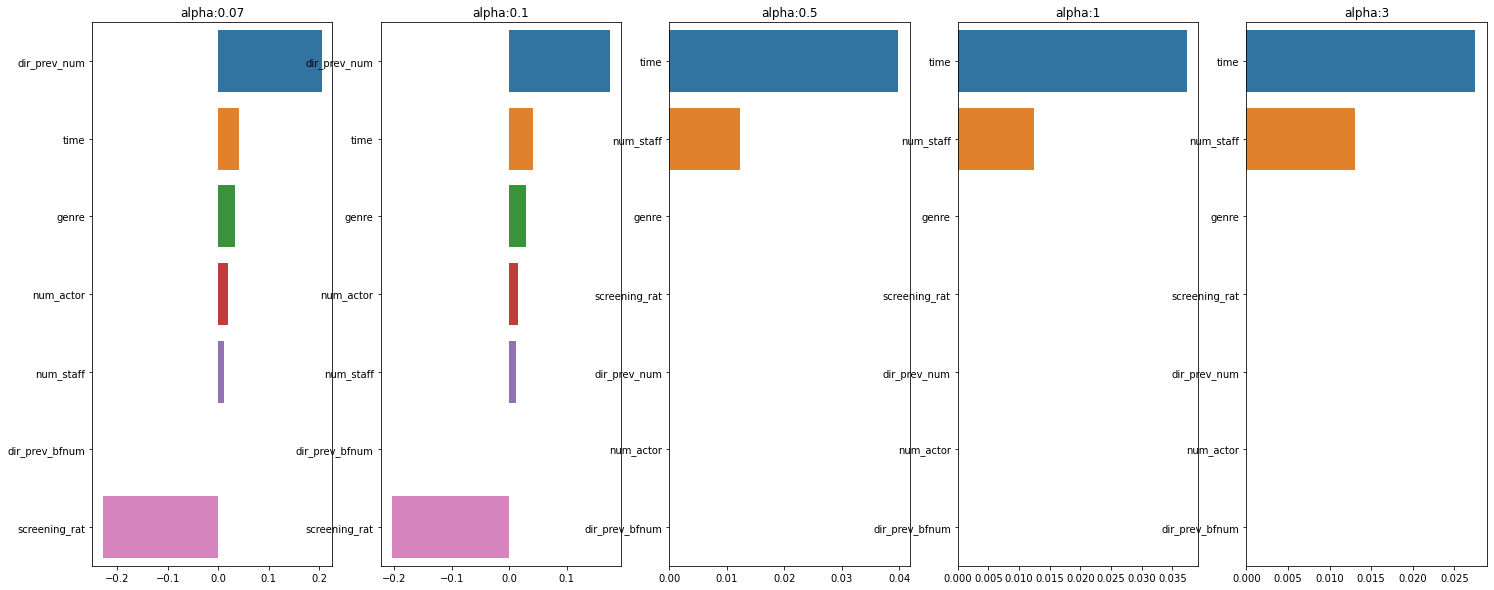

In [27]:
fig , axs = plt.subplots(figsize=(25,10), nrows=1 , ncols=5)

coeff_df = pd.DataFrame()

for pos , alpha in enumerate(lasso_alphas) :
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train , y_train)
    coeff = pd.Series(data=lasso.coef_ , index=X_train.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])
plt.show()

- 알파 값에 따른 피처별 회귀 계수 값을 데이터프레임 형태로 나타내시오. 

In [28]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
dir_prev_num,2.041117e-01,1.754154e-01,0.000000e+00,0.000000e+00,0.000000e+00
time,4.088383e-02,4.087785e-02,3.979522e-02,3.734686e-02,2.755345e-02
genre,3.235288e-02,2.936561e-02,0.000000e+00,0.000000e+00,0.000000e+00
num_actor,1.936078e-02,1.569477e-02,0.000000e+00,0.000000e+00,0.000000e+00
num_staff,1.140701e-02,1.151511e-02,1.234125e-02,1.248222e-02,1.304613e-02
dir_prev_bfnum,-9.479572e-08,-8.889354e-08,-5.294657e-08,-5.082259e-08,-4.232668e-08
screening_rat,-2.281715e-01,-2.048002e-01,-0.000000e+00,-0.000000e+00,-0.000000e+00


### 엘라스틱 넷
- get_linear_reg_eval 함수에 엘라스틱 넷을 적용하여 5개 폴드의 평균 RMSE 점수를 구하시오. 
- random_state=123
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개, elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]

In [29]:
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                     X_data_n=X_train, y_target_n=y_train)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 2.120 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 2.121 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 2.148 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.147 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 2.153 


- 알파 값에 따르 피처별 회귀 계수 값을 데이터프레임 형태로 나타내시오. 

In [30]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
dir_prev_num,2.197901e-01,1.984342e-01,0.000000e+00,0.000000e+00,0.000000e+00
time,4.089803e-02,4.089636e-02,4.049679e-02,3.875618e-02,3.181431e-02
genre,3.439777e-02,3.228867e-02,2.609489e-03,0.000000e+00,0.000000e+00
num_actor,2.198384e-02,1.944187e-02,0.000000e+00,0.000000e+00,0.000000e+00
num_staff,1.134651e-02,1.142678e-02,1.228984e-02,1.240144e-02,1.280159e-02
dir_prev_bfnum,-9.806854e-08,-9.369362e-08,-5.360287e-08,-5.206185e-08,-4.605906e-08
screening_rat,-2.404285e-01,-2.227332e-01,-3.870080e-03,-0.000000e+00,-0.000000e+00


## 회귀 트리와 스태킹 앙상블
### 개별 회귀 트리 모델과 스태킹 회귀 모델의 성능을 비교하시오.
- 개별 회귀 트리 모델: DecisionTreeRegressor(random_state=123)
- 스태킹 앙상블에서의 base model : Ridge(alpha=8), Lasso(alpha=0.001), XGBRegressor(n_estimators=1000, learning_rate=0.05), LGBMRegressor(n_estimators=1000, learning_rate=0.05)
- 스태킹 앙상블에서의 최종 메타 model : Ridge(alpha=0.1)
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개

In [31]:
#개별 회귀 트리 모델
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=123)
dt_reg.fit(X_train, y_train)
dt_preds = dt_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, dt_preds))
print('개별 DecisionTreeRegressor의 RMSE 값은:', rmse)

개별 DecisionTreeRegressor의 RMSE 값은: 2.69267753479261


In [34]:
#스태킹 앙상블
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

#개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    #지정된 n_folds 값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=123)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__, 'model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습, 예측할 폴드 데이터 세트 추출
        print('폴드 세트:', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:,folder_counter] = model.predict(X_test_n)
        
    #폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [35]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
ridge_reg = Ridge(alpha=8)
lasso_reg = Lasso(alpha=0.001)
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05)
#각 개별 기반(base) 모델이 생성한 학습용, 테스트용 데이터 반환
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge model 시작
폴드 세트: 0 시작
폴드 세트: 1 시작
폴드 세트: 2 시작
폴드 세트: 3 시작
폴드 세트: 4 시작
Lasso model 시작
폴드 세트: 0 시작
폴드 세트: 1 시작
폴드 세트: 2 시작
폴드 세트: 3 시작
폴드 세트: 4 시작
XGBRegressor model 시작
폴드 세트: 0 시작
폴드 세트: 1 시작
폴드 세트: 2 시작
폴드 세트: 3 시작
폴드 세트: 4 시작
LGBMRegressor model 시작
폴드 세트: 0 시작
폴드 세트: 1 시작
폴드 세트: 2 시작
폴드 세트: 3 시작
폴드 세트: 4 시작


In [36]:
#개별 모델이 반환한 학습 및 테스트용 데이터 세트를 스태킹 형태로 결합
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

#최종 메타 모델은 라쏘 모델 적용
meta_model_lasso = Ridge(alpha=0.1)

#개별 모델 예측값을 기반으로 새롭게 만들어진 학습, 테스트 데이터로 메타 모델 예측 및 RMSE 측정
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 1.938240734242398


## 선형 회귀 모델과 파이프라인(Pipeline) 설계
전처리 문제 3번에서 보았듯이, 특정 변수들의 분포도가 치우쳐져 있다. 이를 위해 전처리를 하고 GridSearchCV를 하기 위해선 Pipeline을 설계해야 한다.

### 피처 변수들에 대해 Standard scaling을 하는 전처리 단계와 ElasticNet 모델을 포함하는 Pipeline을 설계하시오.
- ElasticNet 모델의 파라미터: alpha=0.1, l1_ratio=0.7

In [ ]:
#필요한 라이브러리 import
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
el_model = ElasticNet(alpha=0.1, l1_ratio=0.7)
pipe = Pipeline([('my_scaler', scaler),
                 ('my_model', el_model)])

### 피처 변수들에 대해 Standard scaling을 하는 전처리 단계와 ElasticNet 모델을 포함하는 Pipeline을 설계하고, 테스트 세트에 대한 R2 score를 도출하시오.
- ElasticNet 모델의 파라미터: alpha=0.1, l1_ratio=0.7, random_state=123

In [37]:
#필요한 라이브러리 import
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
el_model = ElasticNet(alpha=0.1, l1_ratio=0.7, random_state=123)
pipe = Pipeline([('my_scaler', scaler),
                 ('my_model', el_model)])

In [38]:
pipe.fit(X_train, y_train)
print('테스트 평가:', pipe.score(X_test, y_test))

테스트 평가: 0.6124443086847327


### 파이프라인은 전처리 단계와 함께 GridSearchCV를 할 때 유용하게 사용된다. 앞서 만든 pipe를 토대로 GridSearchCV를 수행하고, 최적의 하이퍼 파라미터와 RMSE를 도출하시오.
- alpha : [0.1, 0.01, 0.05, 0.07]
- l1_ratio : [0, 0.5, 0.7, 0.8, 1]
- max_iter : [10,50,70,100,1000,2000]
- cv = 5, n_jobs=-1

In [39]:
from sklearn.model_selection import GridSearchCV
param_grids = {'my_model__alpha':[0.1, 0.01, 0.05, 0.07],
              'my_model__l1_ratio':[0, 0.5, 0.7, 0.8, 1],
              'my_model__max_iter':[10,50,70,100,1000,2000]}

grid = GridSearchCV(estimator=pipe, param_grid = param_grids, cv=5, n_jobs=-1,
                   scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
rmse = np.sqrt(-1*grid.score(X_test, y_test))

print('최적의 하이퍼 파라미터:', grid.best_params_)
print('RMSE:', rmse)

최적의 하이퍼 파라미터: {'my_model__alpha': 0.05, 'my_model__l1_ratio': 0.8, 'my_model__max_iter': 50}
RMSE: 2.124231531956666
